# Player Performance Analysis

## 1 Business Context / Story
I have been hired as a freelance data analyst by a basketball team’s analytics department.
The coaching staff suspects that traditional scoring statistics (points per game) are not suffieicently or accurately valuing players.

The team want an advanced performance analysis platofrm that evaluates players based on true efficiency, consistency, and situational performance.

The analysis will inform:
- Contract decisions
- Starting lineup optimization
- Player development plans

I am tasked with building a fully documented, stakeholder-friendly analytics project. 

### Data and Package Imports
To begin this project, there are a few necessary pre-requisities which need to be met. This includes the loading of the python packages and data set that I'll be using, as well as getting this data stored as a SQL Database.

In [50]:
%load_ext autoreload
%autoreload 2

#import packages
import pandas as pd
import sqlite3
import helpers.helper as h
import seaborn as sns

df = pd.read_csv(r"C:\Users\Vim-r\OneDrive\Documents\Python\Projects\DataDile\player-performance-efficiency-analysis\data\processed\database_24_25.csv")

conn = sqlite3.connect("nba_stats.db")
df.to_sql("player_stats", conn, if_exists="replace", index=False)

sql = conn.cursor()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


With the prerequisited handled, the data should be checked over

In [51]:
df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


# 2 Data Cleaning and Preprocessing

Some thigns to note, are the stat abbreviations and what they mean:

- Player: Name of the player.
- Tm: Abbreviation of the player's team.
- Opp: Abbreviation of the opposing team.
- Res: Result of the game for the player's team.
- MP: Minutes played, represented as a float (e.g., 23.5 = 23 minutes and 30 seconds).
- FG: Field goals made.
- FGA: Field goal attempts.
- FG%: Field goal percentage.
- 3P: 3-point field goals made.
- 3PA: 3-point field goal attempts.
- 3P%: 3-point shooting percentage.
- FT: Free throws made.
- FTA: Free throw attempts.
- FT%: Free throw percentage.
- ORB: Offensive rebounds.
- DRB: Defensive rebounds.
- TRB: Total rebounds.
- AST: Assists.
- STL: Steals.
- BLK: Blocks.
- TOV: Turnovers.
- PF: Personal fouls.
- PTS: Total points scored.
- GmSc: Game Score, a metric summarizing player performance for the game.
- Data: Date of the game in YYYY-MM-DD format.

Firstly, when investigating the data, we need to understand the quality of the data being used. This is the process of scanning for erronious data. 

In [52]:
df.isna().sum()


Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Data      0
dtype: int64

In [53]:
#Create new stats from exisiting data 

df['TS_PCT'] = df['PTS'] / (2 * (df['FGA'] + 0.44*df['FTA']).replace(0,1)) #true shot percentage
df['REB_EFF'] = df['TRB'] / df['MP'] #rebound efficiency

#push these to SQL
df.to_sql("clean_player_stats", conn, if_exists="replace", index=False)

df.head()


,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,AST,STL,BLK,TOV,PF,PTS,GmSc,Data,TS_PCT,REB_EFF
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,10,1,1,1,1,37,38.1,2024-10-22,0.979873,0.132013
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,4,1,3,1,1,36,34.0,2024-10-22,0.608108,0.425758
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,4,1,0,0,1,24,22.4,2024-10-22,0.864553,0.112655
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,4,1,0,0,2,18,19.5,2024-10-22,1.000000,0.131062
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,2,0,0,1,1,22,17.8,2024-10-22,0.971731,0.000000


# 3 Exploratory Data analysis


To prevent assumptive thinking, it is usually best to look though the data for what it is. This is the phase of exploratory data analysis, where there is a general look at the data, what it contains, means and the presence of any issues.

In [57]:
#df.head()
#df.tail()
#df.info()
df.describe()
#df.isnull().sum()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,TS_PCT,REB_EFF
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,...,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16508.000000
mean,22.405259,3.848958,8.271742,0.427527,1.250061,3.477955,0.263719,1.572917,2.016897,0.417737,...,4.099079,2.453852,0.769985,0.468084,1.273861,1.749152,10.520894,8.575109,0.526610,0.183693
std,10.896645,3.255864,6.071434,0.254938,1.523651,3.151726,0.286271,2.233374,2.688863,0.435771,...,3.478652,2.613505,0.991039,0.833377,1.428819,1.436416,8.829493,7.821577,0.289179,0.162967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.600000,0.000000,0.000000
25%,14.427500,1.000000,4.000000,0.286000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.400000,0.375000,0.082910
50%,23.430000,3.000000,7.000000,0.444000,1.000000,3.000000,0.250000,1.000000,1.000000,0.333000,...,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,9.000000,7.100000,0.545455,0.156986
75%,31.322500,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,...,6.000000,4.000000,1.000000,1.000000,2.000000,3.000000,16.000000,13.300000,0.700000,0.253409
max,50.480000,22.000000,38.000000,1.000000,10.000000,20.000000,1.000000,18.000000,26.000000,1.000000,...,28.000000,22.000000,8.000000,10.000000,11.000000,6.000000,60.000000,54.200000,1.500000,8.333333


#### What is in this dataset?

#### How many rows and columns are there?
From the script above, we can see there are 27 columns of data with 16511 rows.
#### What types of data do we have?
The data types contained in this dataset are not particularly vaired. 

There are predominatly float and integer values, capturing the various player statsistics. Other than these columns there are object/string values for things like the player and team names. 
 
#### Are there any missing values?

#### Are there any obvious errors?

<Axes: >

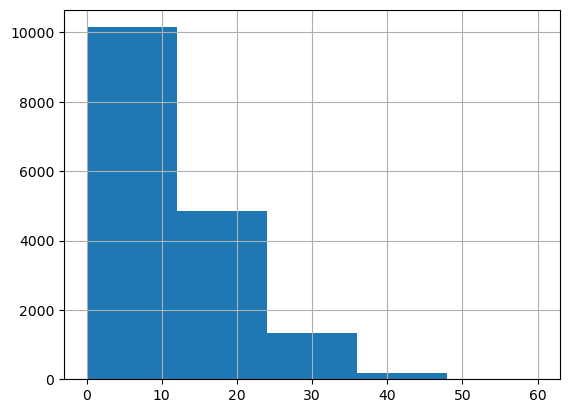

In [46]:
#df.describe()

df['PTS'].hist(bins=5)
